In [6]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import glob
from scipy.ndimage.filters import gaussian_filter


def load_image(img_path):
    img_color = Image.open(img_path)
    img_gray = img_color.convert('L')
    return np.asarray(img_gray), np.asarray(img_color)


def load_images(img_folder_path):
    img_paths = glob.glob(img_folder_path + "/*.png")

    imgs_color = []
    imgs_gray = []
    for path in img_paths:

        img_color, img_gray = load_image(path)
        imgs_color.append(img_color)
        imgs_gray.append(img_gray)

    return imgs_gray, imgs_color


def show_images(img_list):

    fig = plt.figure(figsize=(10,20))
    num_imgs = len(img_list)

    for i, img in enumerate(img_list):
        plt.subplot(num_imgs, 1, i+1)
        if len(img.shape) == 3:
            plt.imshow(img)
        else:
            plt.imshow(img, cmap='gray', vmin=0, vmax=255)

        plt.xticks([])
        plt.yticks([])

    plt.tight_layout()


def construct_focused_image(img_grad_list, img_gray_list):

    imgs_grad_blurred = []
    for img_grad in img_grad_list:
        imgs_grad_blurred.append(gaussian_filter(img_grad, sigma=10))

    imgs_gray = np.array(img_gray_list)
    sharpest_indices = np.argmax(np.array(imgs_grad_blurred), axis=0)
    focused_img_gray = np.take_along_axis(imgs_gray, np.expand_dims(sharpest_indices, axis=0), axis=0)

    h, w = img_grad_list[0].shape
    img_labeled = np.zeros((h, w, 3))
    
    for row  in range(h):
        for col in range(w):
            i = sharpest_indices[row, col]
            if i == 0:
                img_labeled[row, col, 0] = img_gray_list[i][row, col]
            if i == 1:
                img_labeled[row, col, 1] = img_gray_list[i][row, col]
            if i == 2:
                img_labeled[row, col, 2] = img_gray_list[i][row, col]
            if i == 3:
                img_labeled[row, col, 0] = img_gray_list[i][row, col]
                img_labeled[row, col, 2] = img_gray_list[i][row, col]

    return focused_img_gray[0], img_labeled.astype(np.uint8)


C:\Users\jerem\AppData\Local\Temp\ipykernel_13944\324936567.py:5: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


(1200, 1600) (1200, 1600, 3)


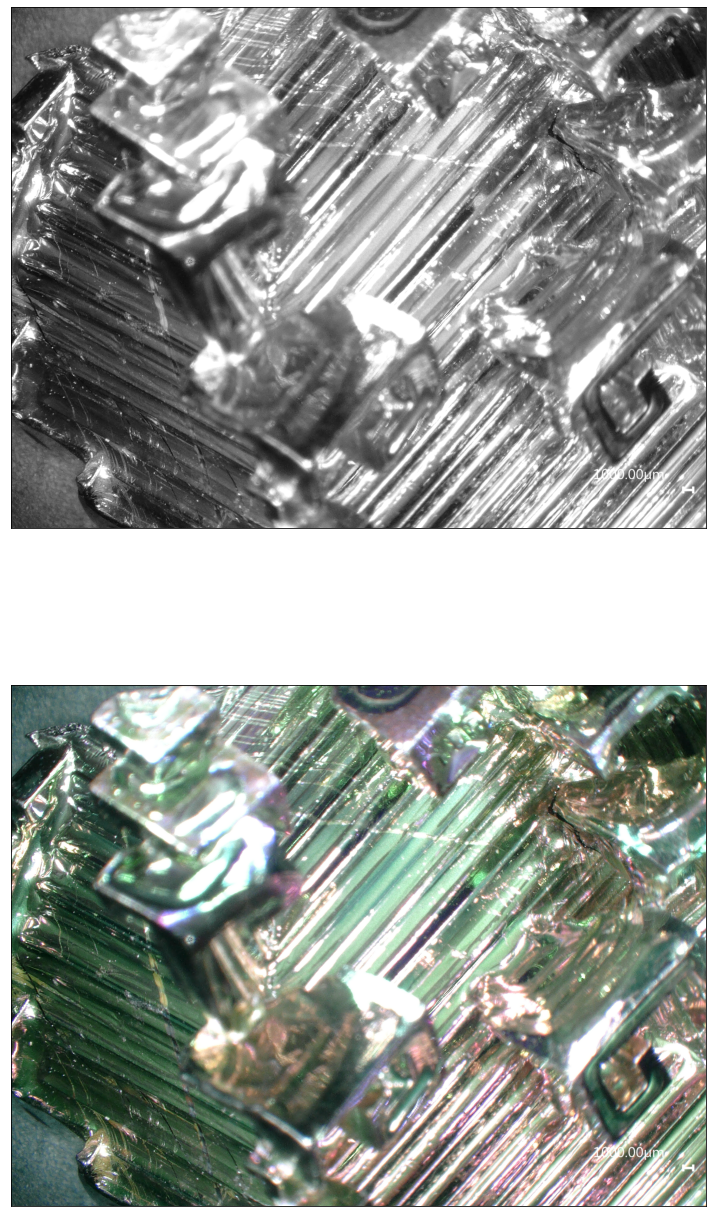

In [7]:
img_gray, img_color = load_image("Bi_dataset/Bi_0.png")
show_images([img_gray, img_color])
print(img_gray.shape, img_color.shape)

In [8]:
# Write sharpness function with gradient
def gradient(img):
    # Calculate difference in x-direction
    x_grad = np.abs(np.diff(img, axis=1, append=0))
    y_grad = np.abs(np.diff(img, axis=0, append=0))

    mag = np.hypot(x_grad, y_grad)
    mag /= np.max(mag)
    mag *= 255

    return mag, x_grad, y_grad

255 0 (1200, 1600)


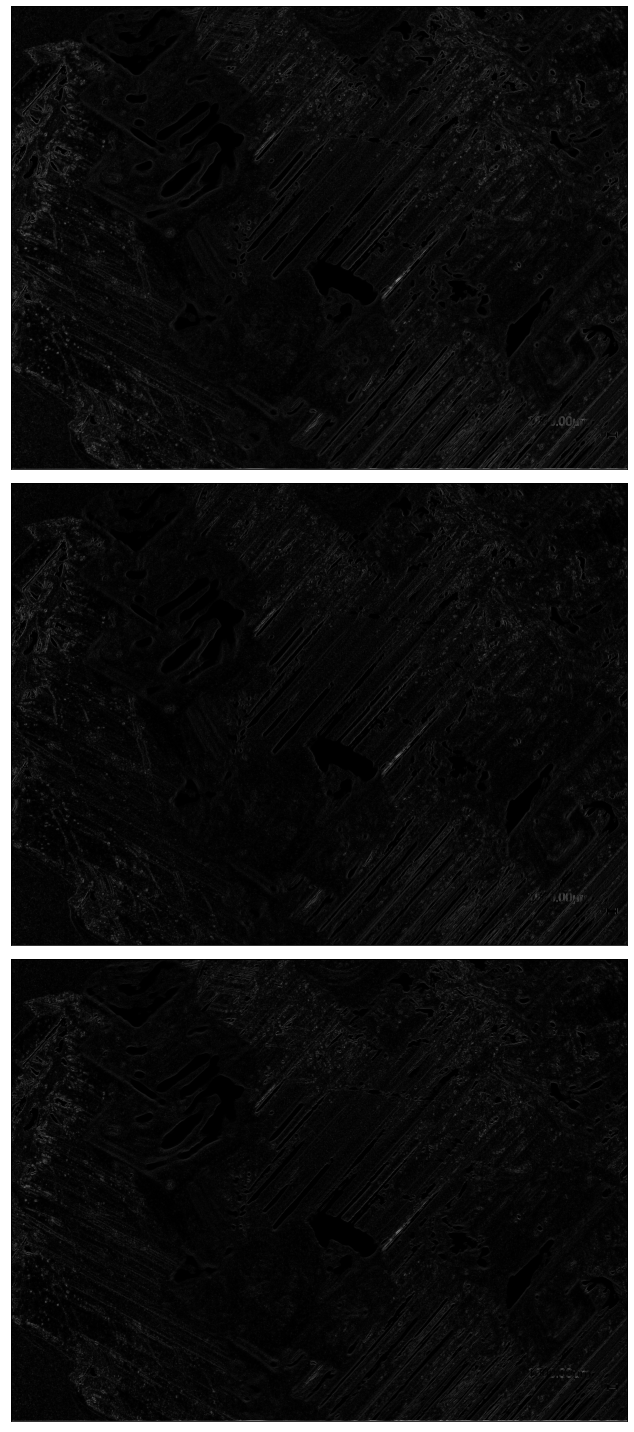

In [9]:
# Show result of gradient
img_grad, img_grad_x, img_grad_y = gradient(img_gray)
show_images([img_grad, img_grad_x, img_grad_y])
print(np.max(img_grad_x), np.min(img_grad_y), img_grad_y.shape)

255 0


TypeError: Invalid shape (1, 1200, 1600) for image data

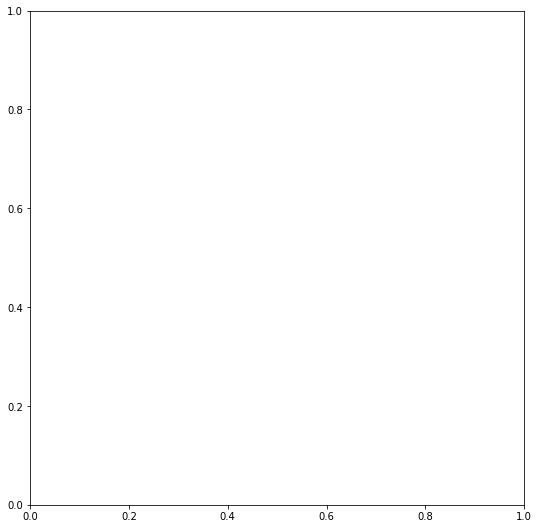

In [10]:
# Show which area is sharpest
imgs_color, imgs_gray = load_images("Bi_dataset")
imgs_grad = []
for img_gray in imgs_gray:
    img_grad, img_grad_x, img_grad_y = gradient(img_gray)
    imgs_grad.append(img_grad)

img_focused, img_labeled = construct_focused_image(imgs_grad, imgs_gray)

print(np.max(img_focused), np.min(img_labeled))

show_images([img_focused, img_labeled])

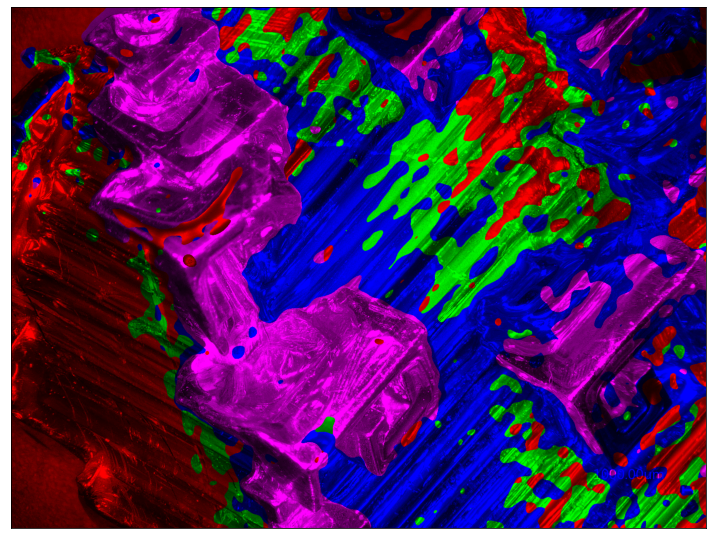